# The Spark Foundation (Grip August 2021)

# TASK 1 Predicting using Supervised Learning

## Objective : Predict the percentage of an student based on the no. of study hours.

### Problem : What will be predicted score if a student studies for 9.25 hrs/ day?

### Author : Rahul Kumar Singh

## Importing Important Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
%matplotlib inline

## Importing Data

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)   

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Summary Of Data

In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Checking the null values in dataframe

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### we found that, there is no missing value in our dataframe

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Drawing a boxplot for checking outliers

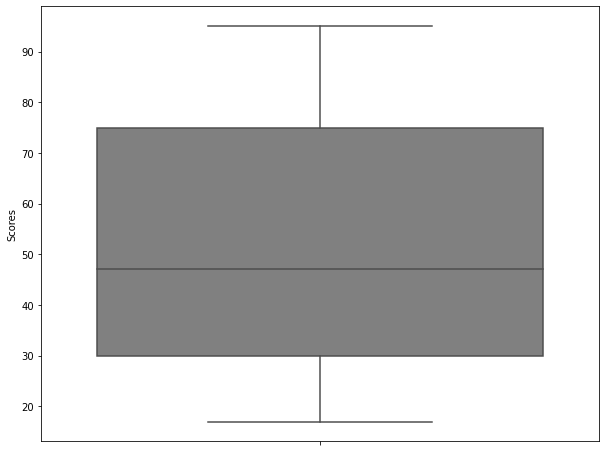

In [8]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,y='Scores',color='grey');

##### From above plot we conclude that there is no outlier present in our dataframe

## Data Visualization

#### Scatterplot between Hours vs Study

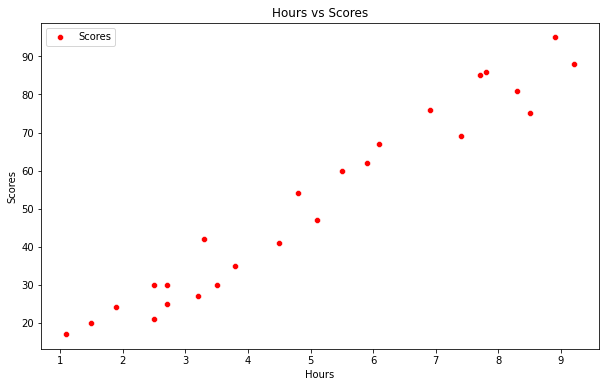

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Hours',y='Scores',color='red',label='Scores')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

##### From the above graph  it is clear that there is linear relationship between Hours and Scores.

## Modelling of Data

In [10]:
# seprate input and output
X=df[['Hours']]
y=df['Scores']

#### Splitting the data into training and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Training the model

In [12]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Intercept and cofficient

In [13]:
print("Intercept : ",model.intercept_)
print("Cofficient : ",model.coef_)

Intercept :  2.1024930747922213
Cofficient :  [9.96651548]


#### Predicted y for test set

In [14]:
y_pred=model.predict(X_test)

In [15]:
y_pred

array([27.01878177, 78.84466226, 39.97525189, 75.85470762, 56.91832821,
       49.94176737, 33.99534261, 86.81787465])

#### Creat a dataframe including both actual and predicted target value

In [16]:
actual_vs_pred_df=pd.DataFrame({'Actual y':y_test,'Predicted Y':y_pred})
actual_vs_pred_df

,Actual y,Predicted Y
16,30,27.018782
10,85,78.844662
22,35,39.975252
19,69,75.854708
7,60,56.918328
21,54,49.941767
2,27,33.995343
3,75,86.817875


#### Visualization of actual vs predicted

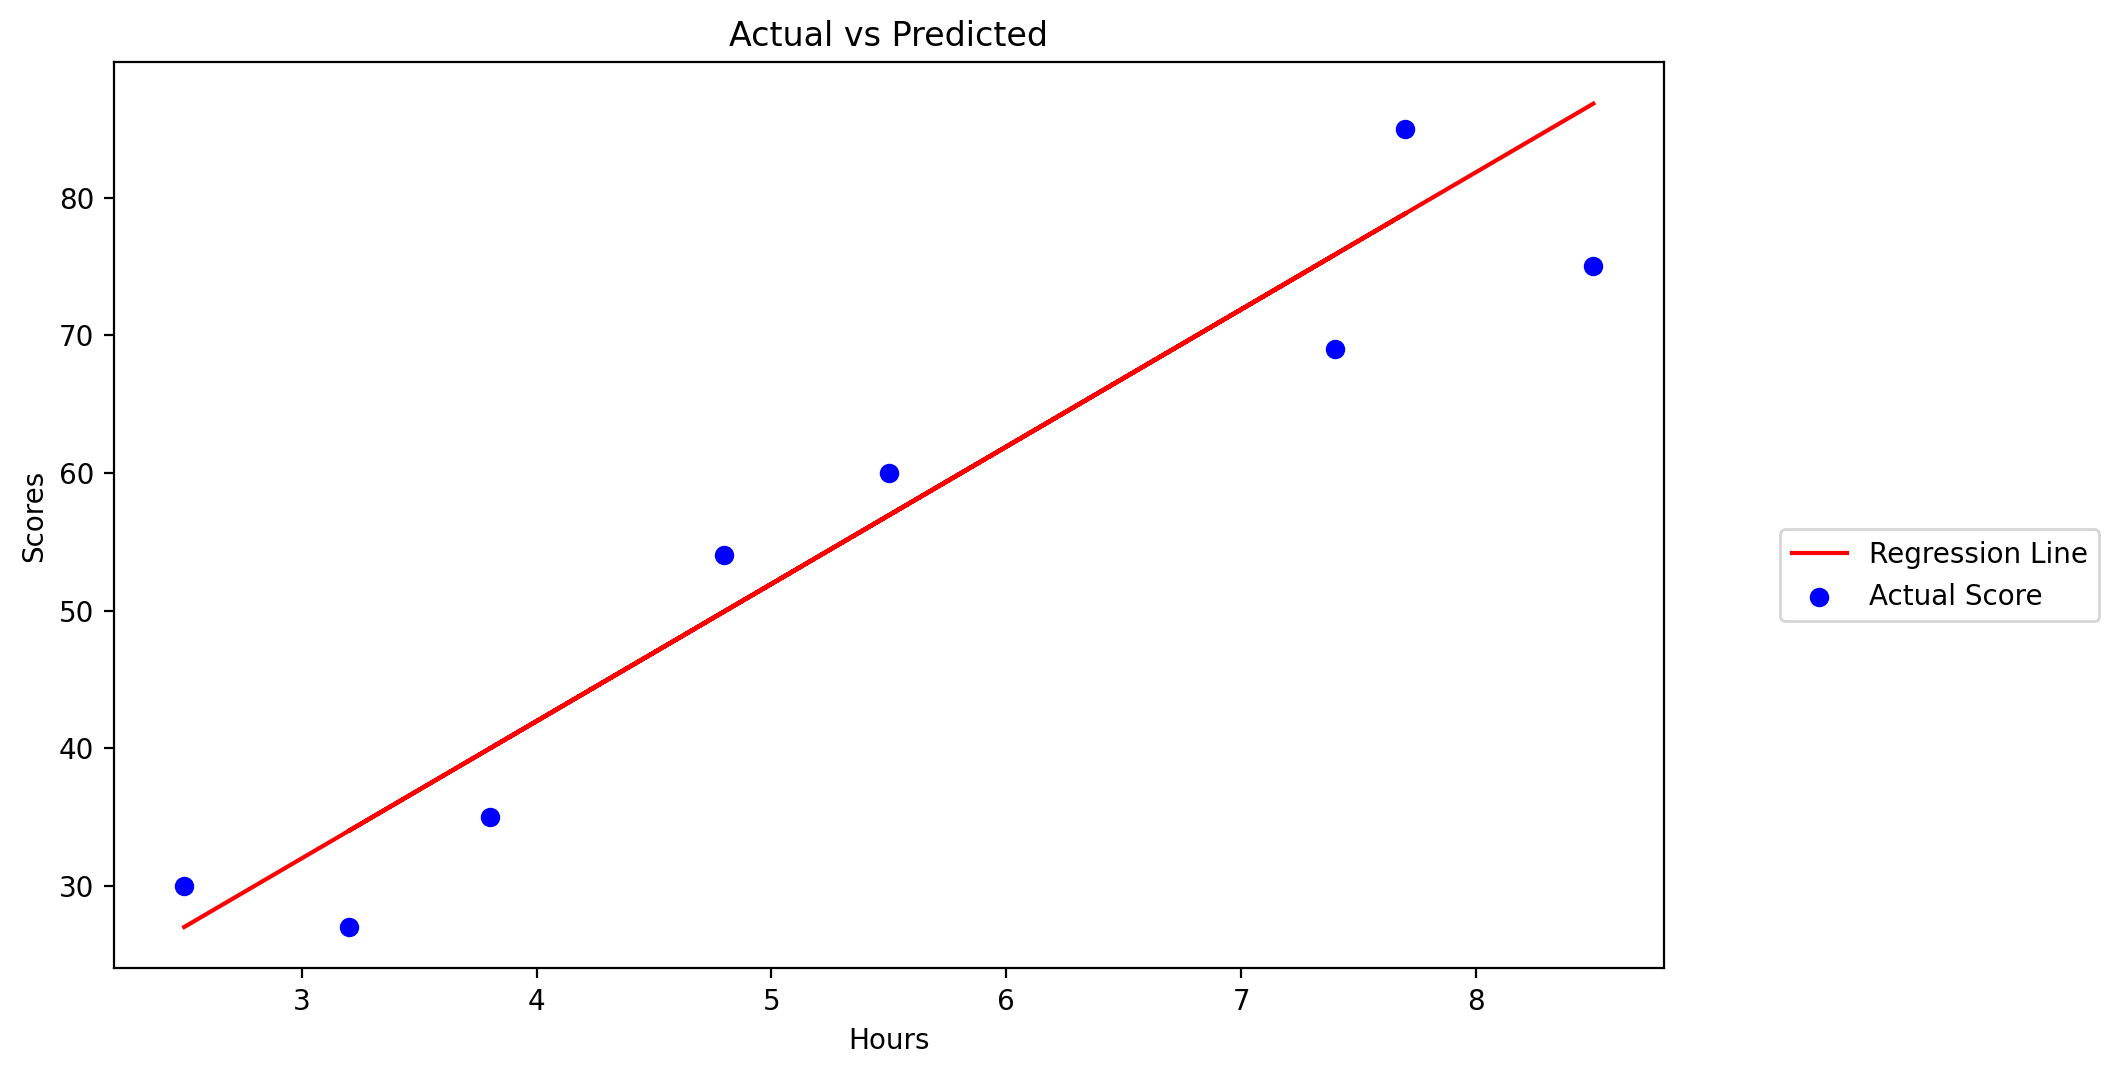

In [17]:
plt.figure(figsize=(10,6),dpi=200)
plt.scatter(X_test,y_test,color='blue',label='Actual Score')
plt.plot(X_test,y_pred,color='red',label='Regression Line')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(bbox_to_anchor=(1.29,.5))
plt.show()

##### From above graph, we see that the predicted regression line is good fit for test set.

#### Calculating the model accuracy

In [18]:
print("Training Score : ",model.score(X_train,y_train))
print("Testing Score : ",model.score(X_test,y_test))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Training Score :  0.9662064488954937
Testing Score :  0.8999124290533055
Mean Absolute Error :  5.864954643694258
Mean Squared Error :  41.634865645528876
Root Mean Squared Error :  6.4525084769823335


#### Creat a final model that include all the data which are present in our dataframe

In [19]:
final_model=LinearRegression()
final_model.fit(X,y)

LinearRegression()

#### Predict the value for given hours of study

In [20]:
Hours_studies=[[9.25]]
pred_score=final_model.predict(Hours_studies)
print('Predicted Score : ',pred_score)

Predicted Score :  [92.90985477]


#### If a student studied 9.25 hours/day the we can expect that he/she would score approx 92.90985477.

# Thank U 